
### Случайный лес (Random forest)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def plot_scatter(X, color, alpha = 5):
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c = color,
                       alpha = alpha,
                       edgecolot = 'k')

In [3]:
n_samples = 1000
random_state = 42
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = n_samples,
                  cluster_std = [1.0, 1.0, 1.5],
                  centers = [(-6, 6), (0, 0), (6, 6)],
                  random_state = random_state)

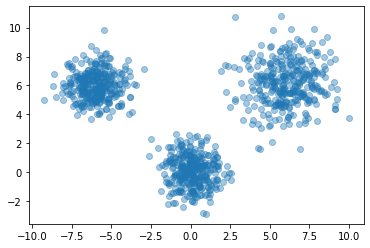

In [4]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.4)

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
rnd_cls = RandomForestClassifier(n_estimators = 500,
                                 criterion = 'entropy',
                                 max_depth = 30, random_state = 0)

In [7]:
rnd_cls = rnd_cls.fit(X, y)
print(rnd_cls.predict([[-10, 10]]))

[0]


In [8]:
label_rf = np.array([])
for i in range(len(X)):
    label_ex_rf = rnd_cls.predict([[X[i, 0], X[i, 1]]])
    label_rf = np.hstack([label_rf, label_ex_rf])

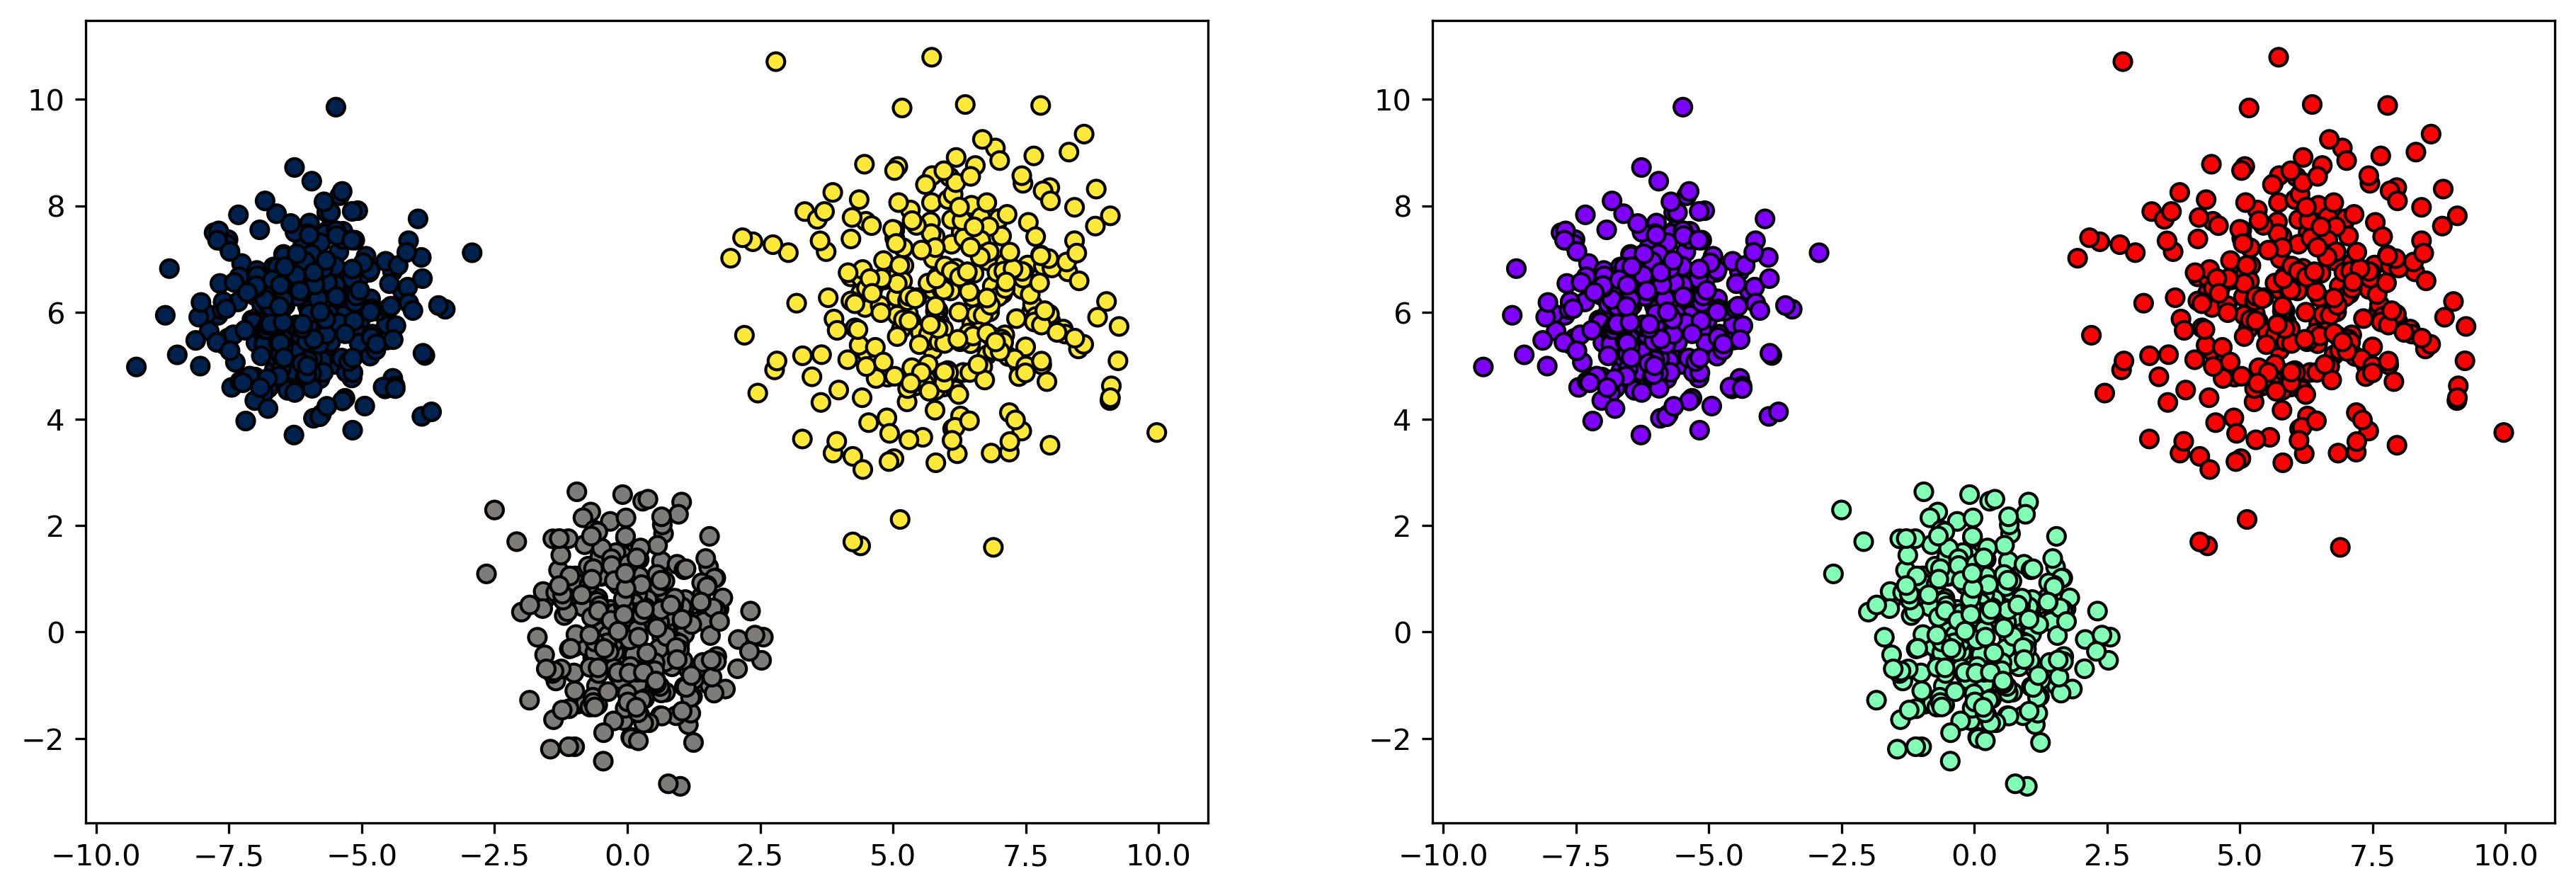

In [9]:
fig = plt.figure(figsize = (15, 5), dpi = 300)
# Априорные данные
ax = fig.add_subplot(121)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'cividis', edgecolors = 'k')
# Расчетные данные
ax = fig.add_subplot(122)
plt.scatter(X[:, 0], X[:, 1], c = label_rf, cmap = 'rainbow', edgecolors = 'k')

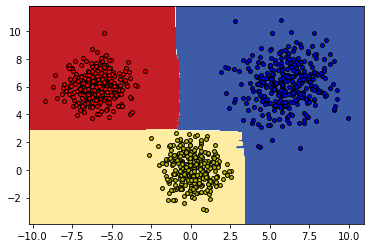

In [10]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)
Z = rnd_cls.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c = color, cmap = plt.cm.RdYlBu,
                edgecolor = 'black', s = 15)

In [11]:
print(rnd_cls.predict([[-10, 10]]))

[0]


In [12]:
from sklearn.datasets import make_circles
n_samples = 500
X_cir, y_cir = make_circles(n_samples = n_samples, factor = 0.5, noise = 0.05)

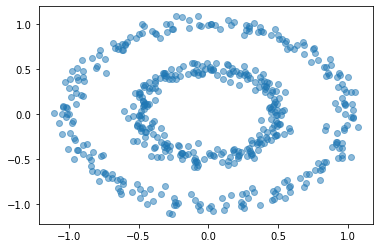

In [13]:
plt.scatter(X_cir[:, 0], X_cir[:, 1], alpha = 0.5)

In [14]:
rnd_frst_cir = RandomForestClassifier(n_estimators = 500,
                                      criterion = 'entropy', max_depth = 30,
                                      random_state = 0)
rnd_frst_cir = rnd_frst_cir.fit(X_cir, y_cir)

In [15]:
label_rf_cir = np.array([])
for i in range(len(X_cir)):
    label_ex_rf_cir = rnd_frst_cir.predict([[X_cir[i, 0], X_cir[i, 1]]])
    label_rf_cir = np.hstack([label_rf_cir, label_ex_rf_cir])

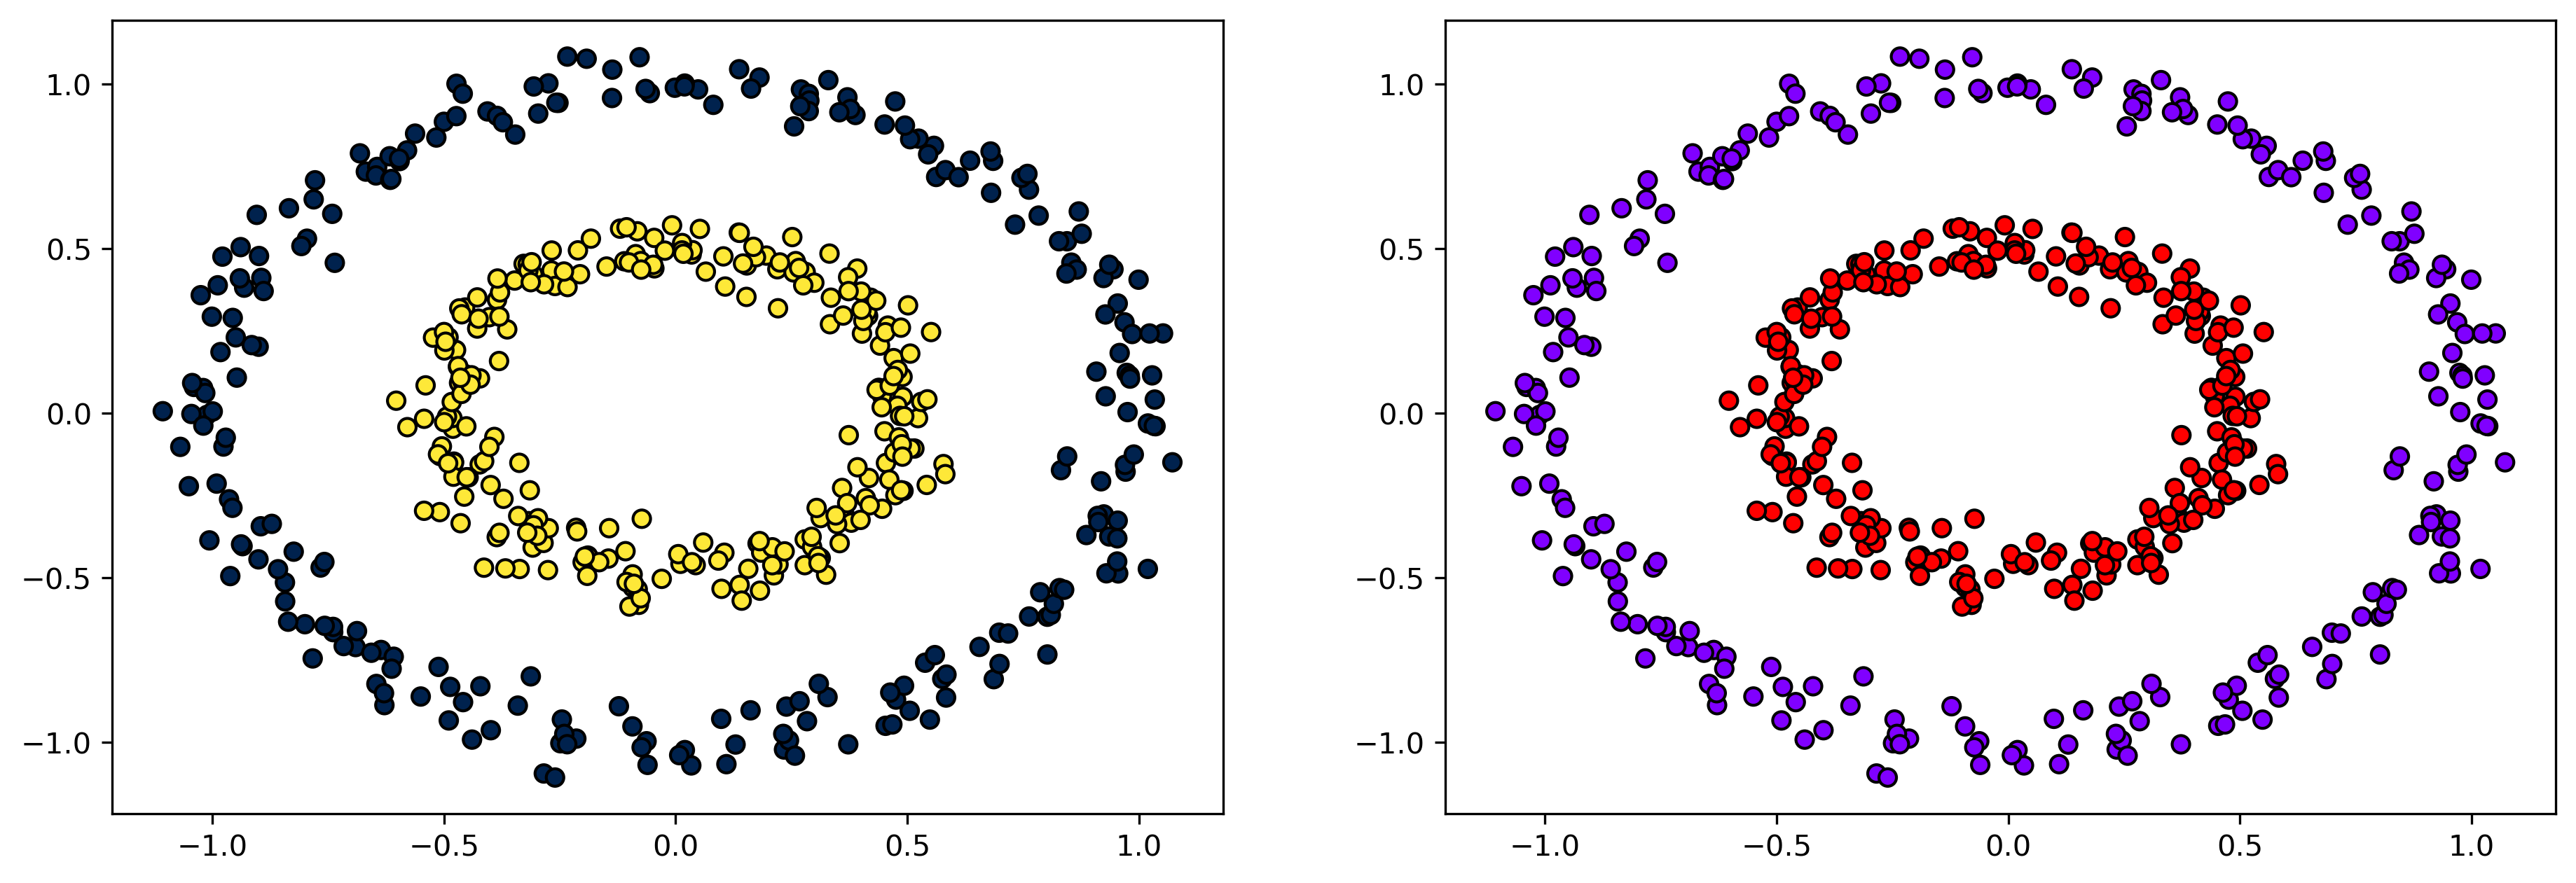

In [16]:
fig = plt.figure(figsize = (15, 5), dpi = 300)
# Априорные данные
ax = fig.add_subplot(121)
plt.scatter(X_cir[:, 0], X_cir[:, 1],
            c = y_cir, cmap = 'cividis', edgecolors = 'k')
# Расчетные данные
ax = fig.add_subplot(122)
plt.scatter(X_cir[:, 0], X_cir[:, 1],
            c = label_rf_cir, cmap = 'rainbow', edgecolors = 'k')

In [17]:
print(label_rf_cir)

[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.

<Figure size 432x288 with 0 Axes>

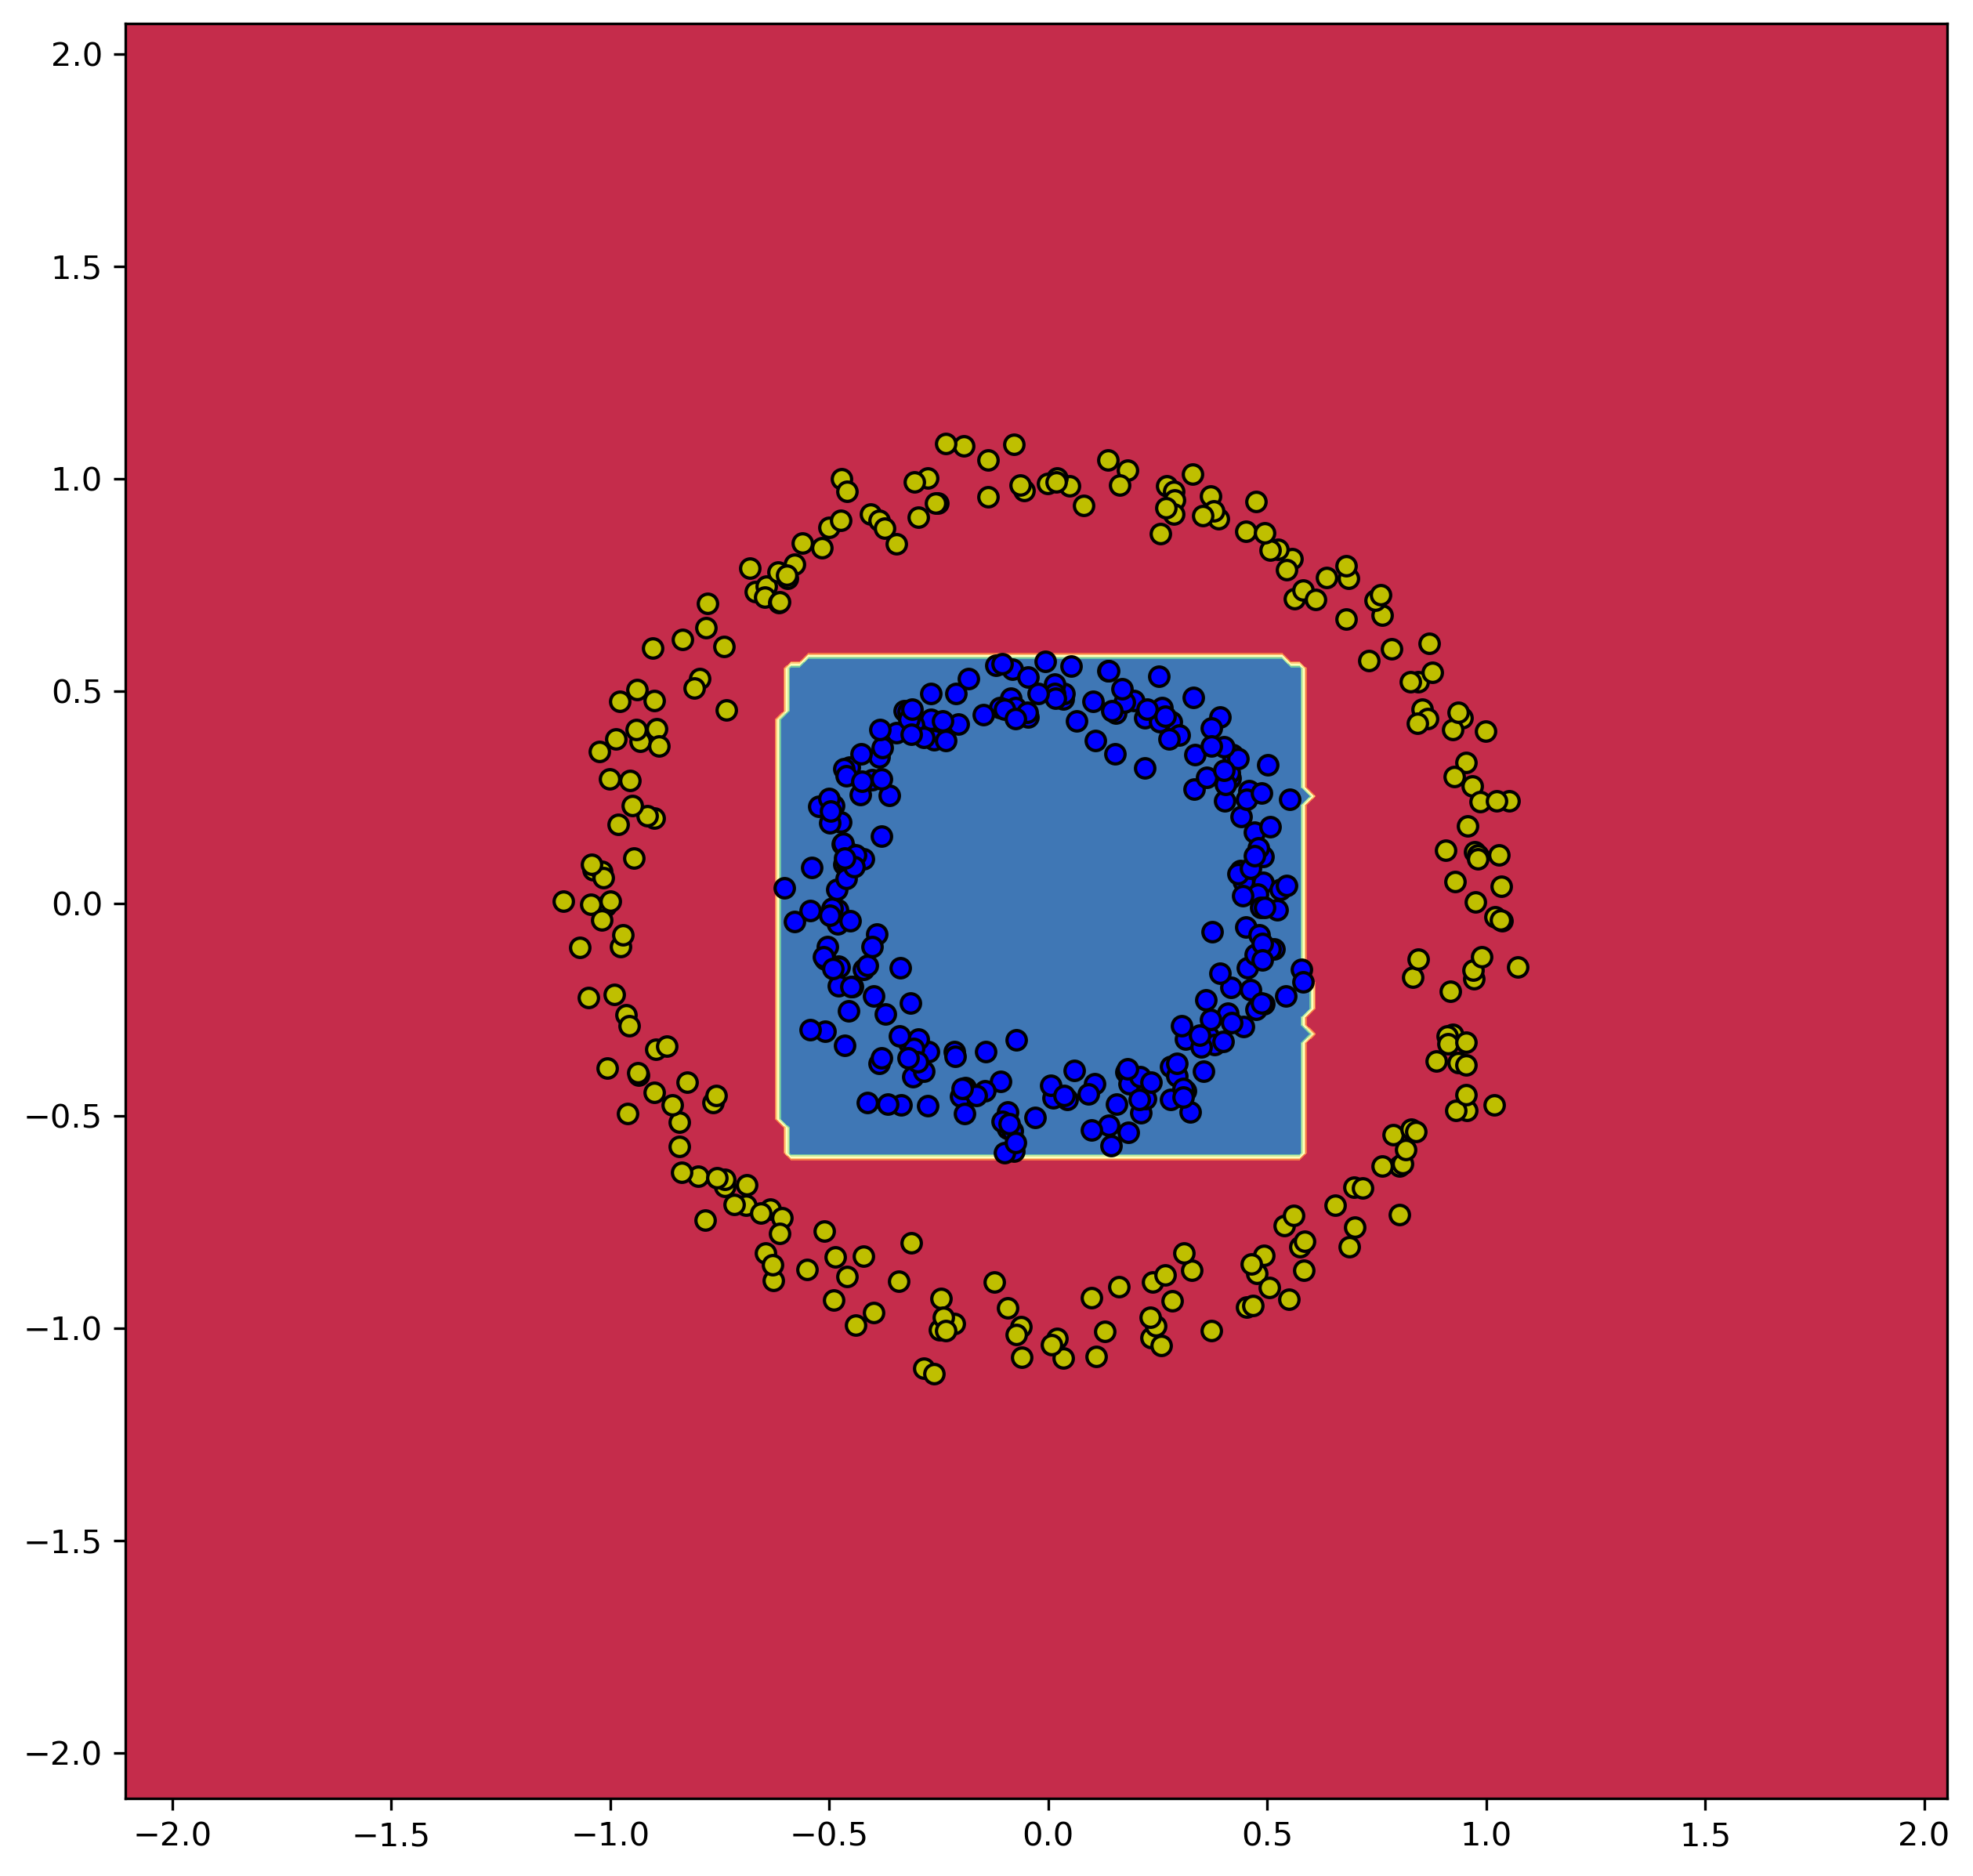

In [18]:
# Рисуем области достяжимости
n_classes = 2
plot_colors = 'yb'
plot_step = 0.02
x_min, x_max = X_cir[:, 0].min() - 1, X_cir[:, 0].max() + 1
y_min, y_max = X_cir[:, 1].min() - 1, X_cir[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad = 0.1, w_pad = 0.1, pad = 1.5)
Z = rnd_frst_cir.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize = (10, 10), dpi = 300)
cs = plt.contourf(xx, yy, Z, cmap = plt.cm.Spectral)
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_cir == i)
    plt.scatter(X_cir[idx, 0], X_cir[idx, 1], c = color,
                cmap = 'inderno',
                edgecolor = 'black', s = 35)